In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

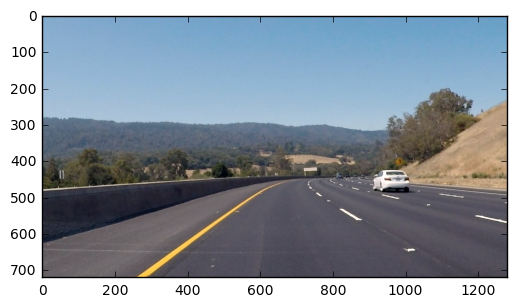

In [16]:
img = mpimg.imread("./curved-lane.jpg")
plt.imshow(img);

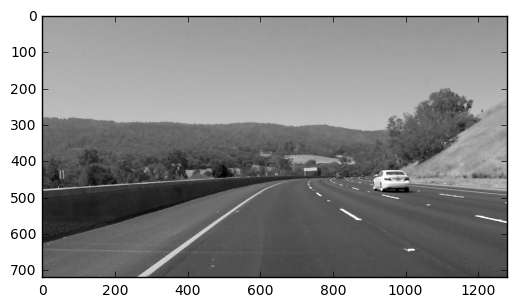

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

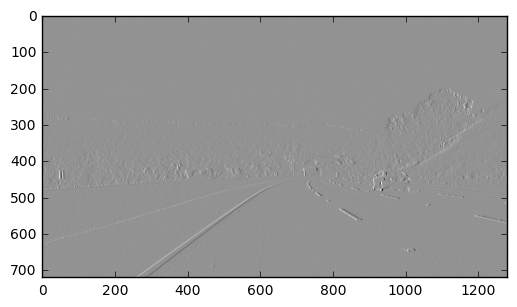

In [18]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
plt.imshow(sobelx, cmap="gray")

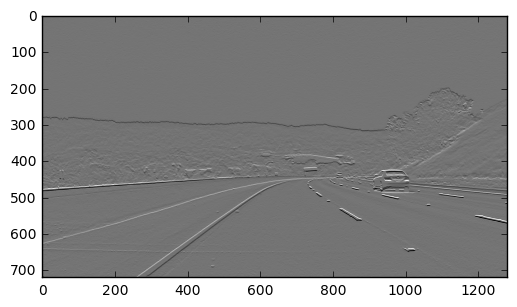

In [19]:
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
plt.imshow(sobely, cmap="gray")

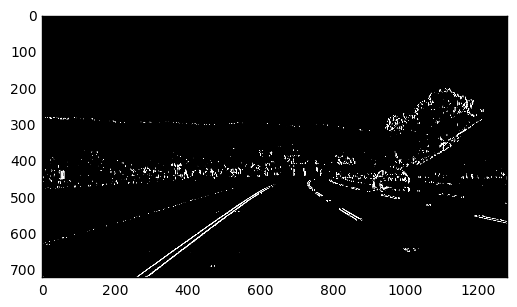

In [20]:
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')